# Lab: Joining and Analyzing Movie and Review Data

## Tasks:
1. Data Preparation and Exploration:
- Load the movies.csv and reviews.csv datasets into pandas dataframes.

In [2]:
import pandas as pd

movie_dataset = pd.read_csv('movies.csv')
review_dataset = pd.read_csv('reviews.csv')

- Display summary statistics and the first few rows of each dataframe to understand their structure.

In [3]:
movie_dataset.head(5)

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980


In [4]:
movie_dataset.describe()

,movie_id,release_year
count,100.000000,100.000000
mean,50.500000,2001.670000
std,29.011492,13.758417
min,1.000000,1980.000000
25%,25.750000,1988.000000
50%,50.500000,2001.500000
75%,75.250000,2014.250000
max,100.000000,2023.000000


In [5]:
review_dataset.head(5)

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13


In [6]:
review_dataset.describe()

,review_id,movie_id,rating
count,300.000000,300.00000,300.000000
mean,150.500000,52.99000,5.328333
std,86.746758,27.98835,2.580354
min,1.000000,1.00000,1.000000
25%,75.750000,29.75000,3.000000
50%,150.500000,54.00000,5.200000
75%,225.250000,76.25000,7.400000
max,300.000000,100.00000,10.000000


2. Highest Rated Movies:
- Perform an inner join on the `movies` and `reviews` dataframes based on the `movie_id` column.

In [7]:
merged_dataset = pd.merge(movie_dataset, review_dataset, on='movie_id')
merged_dataset.head(5)

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12


- Calculate the average rating for each movie.

In [8]:
merged_dataset.groupby('title')['rating'].mean()

title
3 Idiots              3.300000
A Beautiful Mind      7.625000
A Clockwork Orange    7.300000
Alien                 3.133333
Aliens                5.400000
                        ...   
Vertigo               9.350000
WALL-E                6.000000
Whale Rider           4.250000
Whiplash              7.300000
Your Name             6.250000
Name: rating, Length: 96, dtype: float64

- Identify the top 10 highest-rated movies.
- Display the titles and average ratings of these top 10 movies.

In [9]:
merged_dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
The Dark Knight            9.800
Vertigo                    9.350
City Lights                9.250
Jaws                       8.600
Scarface                   8.000
Grave of the Fireflies     8.000
The Empire Strikes Back    8.000
North by Northwest         7.650
A Beautiful Mind           7.625
Oldboy                     7.500
Name: rating, dtype: float64

3. Genre Analysis:
- Group the joined dataframe by genre and calculate the average rating for each genre.
- Determine which genre has the highest average rating.
- Display the genres along with their average ratings.

In [10]:
merged_dataset.groupby('genre')['rating'].mean().sort_values(ascending=False)

genre
Sci-Fi       6.118421
Fantasy      5.768421
Biography    5.279310
Drama        5.204478
Action       5.109375
Crime        4.901493
Name: rating, dtype: float64

4. Reviewer Analysis:
- Identify the top 5 reviewers who have given the most reviews.
- Calculate the average rating given by each of these top 5 reviewers.
- Display the reviewer names and their average ratings.

In [11]:
top5_reviewers = review_dataset['reviewer'].value_counts().sort_values(ascending=False).head(5).index
merged_dataset[merged_dataset['reviewer'].isin(top5_reviewers)].groupby('reviewer')['rating'].mean()

reviewer
Henry Harris    4.473333
John Smith      4.542857
Ryan Hall       7.030769
Tom Young       5.400000
Uma King        5.500000
Name: rating, dtype: float64

5. Time-Based Analysis:
- Analyze how movie ratings have changed over time.
- Group the joined dataframe by the month extracted from the `review_date` column and calculate the average rating for each month.
- Create a line plot showing the trend of average movie ratings over time.
- Discuss any observable trends.

<Axes: xlabel='review_month'>

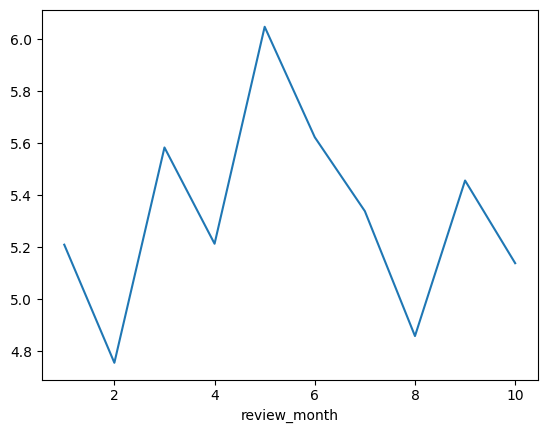

In [12]:
merged_dataset['review_month'] = pd.to_datetime(merged_dataset['review_date']).dt.month
merged_dataset.groupby('review_month')['rating'].mean().plot()

6. Movies with Most Reviews:
- Identify the top 10 movies that have received the most reviews.
- Display the titles of these movies along with the number of reviews they have received.

In [13]:
merged_dataset.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Full Metal Jacket        7
Interstellar             7
The Truman Show          6
Capernaum                6
Paths of Glory           6
Memento                  6
It's a Wonderful Life    6
Shutter Island           6
The Revenant             6
The Dark Knight Rises    5
Name: rating, dtype: int64

7. Distribution of Ratings:
- Create a histogram to visualize the distribution of ratings.
- Analyze the distribution and discuss any skewness or patterns observed in the ratings.

<Axes: ylabel='Frequency'>

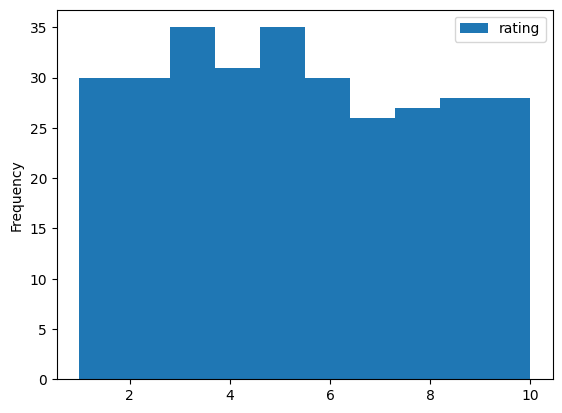

In [14]:
merged_dataset.plot(kind='hist', y='rating', bins=10)

8. Impact of Release Year:
- Analyze if there is any correlation between the release year of a movie and its average rating.
- Create a scatter plot showing the relationship between the release year and the average rating.
- Discuss any observable patterns or correlations.

<Axes: xlabel='release_year', ylabel='rating'>

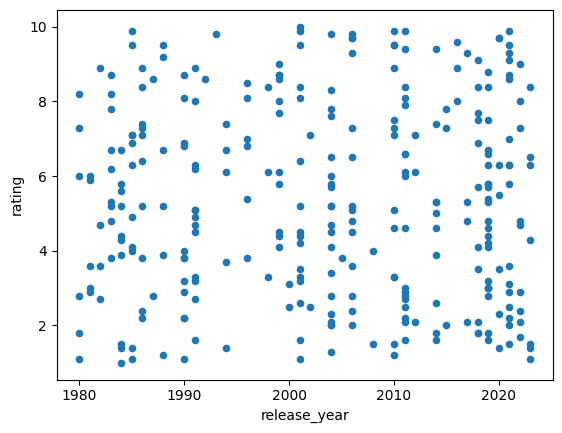

In [15]:
merged_dataset.plot(kind='scatter', x='release_year', y='rating')

9. Reviewer Consistency:
- For each reviewer, calculate the standard deviation of their ratings.
- Identify the most and least consistent reviewers based on the standard deviation of their ratings.
- Display the names of these reviewers along with their standard deviations.

In [16]:
reviewers = merged_dataset.groupby('reviewer')['rating'].std().sort_values(ascending=False).reset_index()
print(reviewers.iloc[0])
print()
print(reviewers.iloc[-1])

reviewer    Zane Carter
rating         3.567718
Name: 0, dtype: object

reviewer    Noah Robinson
rating           1.773415
Name: 26, dtype: object


10. Challenge Task - Genre Popularity Over Time:
- Analyze how the popularity of different genres has changed over time.
- Group the joined dataframe by genre and the year extracted from the review_date column.
- Calculate the number of reviews for each genre per month.
- Create a line plot for each genre showing the number of reviews over time.
- Discuss any trends or shifts in genre popularity over time.

genre   release_year
Action  1980             2
        1984             6
        1985             4
        1988             4
        2006            10
                        ..
Sci-Fi  2015             3
        2016             1
        2017             2
        2021             6
        2023             1
Name: rating, Length: 77, dtype: int64


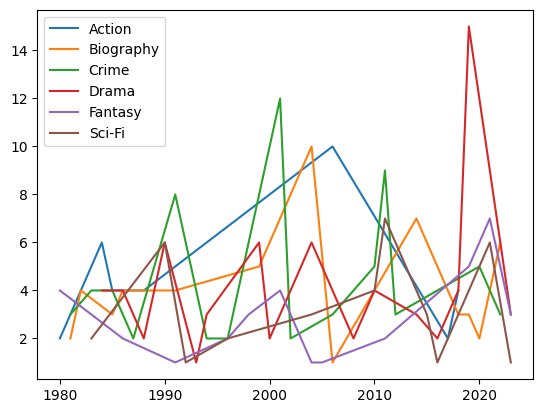

In [43]:
import matplotlib.pyplot as plt

genre_reviews_per_year = merged_dataset.groupby(['genre', 'release_year'])['rating'].count()
print(genre_reviews_per_year)

for genre, data in genre_reviews_per_year.groupby('genre'):
    plt.plot(data.index.get_level_values('release_year'), data.values, label=genre)

plt.legend()